In [36]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

Importing data

In [2]:
X_train = pd.read_csv('X-train.csv', header=None)
y_train = pd.read_csv('y-train.csv', header=None)

In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,14.1,2.0,4.3,0.469,1.0,2.8,0.371,1.0,0.651,0.6,0.788,0.788,0.5,2.1,0.4,0.3,0.3,1.8,5.6
1,5.6,0.4,1.7,0.250,0.1,0.9,0.167,0.3,0.333,0.1,0.500,0.500,0.4,0.6,0.1,0.2,0.1,0.2,1.1
2,33.8,7.3,14.4,0.505,1.8,5.6,0.325,5.5,0.618,4.4,0.885,0.885,1.7,6.5,5.3,0.8,0.7,3.9,20.8
3,37.8,9.8,19.2,0.512,3.3,7.9,0.414,6.5,0.581,4.6,0.944,0.944,1.2,3.9,6.6,1.2,0.4,3.1,27.5
4,11.4,2.6,5.0,0.520,0.8,2.4,0.333,1.8,0.692,0.2,1.000,1.000,0.2,1.6,2.0,1.0,0.2,1.0,6.2


In [4]:
len(X_train)

427

In [5]:
y_train[0].unique()

array([1, 3, 2, 4, 0], dtype=int64)

In [6]:
train_data = pd.concat([X_train, y_train.rename(columns={0:'y'})], axis=1)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,y
0,14.1,2.0,4.3,0.469,1.0,2.8,0.371,1.0,0.651,0.6,0.788,0.788,0.5,2.1,0.4,0.3,0.3,1.8,5.6,1
1,5.6,0.4,1.7,0.250,0.1,0.9,0.167,0.3,0.333,0.1,0.500,0.500,0.4,0.6,0.1,0.2,0.1,0.2,1.1,3
2,33.8,7.3,14.4,0.505,1.8,5.6,0.325,5.5,0.618,4.4,0.885,0.885,1.7,6.5,5.3,0.8,0.7,3.9,20.8,1
3,37.8,9.8,19.2,0.512,3.3,7.9,0.414,6.5,0.581,4.6,0.944,0.944,1.2,3.9,6.6,1.2,0.4,3.1,27.5,2
4,11.4,2.6,5.0,0.520,0.8,2.4,0.333,1.8,0.692,0.2,1.000,1.000,0.2,1.6,2.0,1.0,0.2,1.0,6.2,4


In [38]:
corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Jimmy\AppData\Local\Temp\ipykernel_688\362913726.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.00,0.88,0.89,0.14,0.70,0.72,0.15,0.77,0.12,0.72,0.26,0.26,0.33,0.71,0.73,0.70,0.38,0.70,0.87
1,0.88,1.00,0.98,0.23,0.66,0.68,0.13,0.94,0.15,0.87,0.25,0.25,0.31,0.74,0.74,0.57,0.37,0.59,0.99
2,0.89,0.98,1.00,0.07,0.75,0.78,0.15,0.88,0.04,0.84,0.28,0.28,0.20,0.66,0.76,0.59,0.28,0.55,0.98
3,0.14,0.23,0.07,1.00,-0.19,-0.25,0.00,0.37,0.69,0.17,-0.07,-0.07,0.52,0.37,0.02,0.03,0.41,0.32,0.18
4,0.70,0.66,0.75,-0.19,1.00,0.98,0.40,0.37,-0.09,0.48,0.34,0.34,-0.16,0.31,0.54,0.46,0.01,0.29,0.71
5,0.72,0.68,0.78,-0.25,0.98,1.00,0.32,0.40,-0.09,0.52,0.34,0.34,-0.15,0.33,0.57,0.48,0.01,0.31,0.73
6,0.15,0.13,0.15,0.00,0.40,0.32,1.00,-0.01,-0.12,0.07,0.19,0.19,-0.27,-0.05,0.09,0.09,-0.09,-0.00,0.16
7,0.77,0.94,0.88,0.37,0.37,0.40,-0.01,1.00,0.23,0.85,0.16,0.16,0.45,0.77,0.67,0.50,0.45,0.60,0.91
8,0.12,0.15,0.04,0.69,-0.09,-0.09,-0.12,0.23,1.00,0.09,-0.04,-0.04,0.35,0.28,0.00,0.03,0.29,0.25,0.12
9,0.72,0.87,0.84,0.17,0.48,0.52,0.07,0.85,0.09,1.00,0.27,0.27,0.25,0.63,0.68,0.46,0.31,0.49,0.90


Creating validation set

In [7]:
valid_data = train_data[0:100]
# train on data that excludes validation set
train_data_exc = train_data[100:len(train_data)]

Creating model using Quadratic Discriminant Analysis

In [8]:
#computes covariance matrices for 5 classes
def computeCovMatrices(data):
    n_classes = data['y'].nunique()
    multiclassClass = []
    Xclass = []
    ns = []
    means = []
    covMatrices = []
    for i in range(n_classes):
        multiclassClass.append(np.array(data[data['y']==i])[:,0:-1])
    for i in range(n_classes):
        current = multiclassClass[i]
        mean = current.mean(axis=0)
        means.append(mean)
        Xclass.append(current - mean)
        n = multiclassClass[i].shape[0]
        ns.append(n)
        covMatrix = (1/n) * Xclass[i].T @ Xclass[i]
        covMatrices.append(covMatrix)
    return covMatrices, means, ns

In [9]:
output = computeCovMatrices(train_data_exc)
covMatrices = output[0]
means = output[1]
sampleSizes = output[2]

In [10]:
# QDA for one data point
def QDA(x, Cs, means, ns):
    mvn = scipy.stats.multivariate_normal
    pyi = [n/sum(ns) for n in ns]
    probabilities = []
    for i in range(len(Cs)):
        probabilities.append(mvn.pdf(x, mean=means[i], cov=Cs[i] + .01 * np.eye(19)) * pyi[i])
    return probabilities.index(max(probabilities))

In [11]:
def makePredictions(X):
    preds = []
    X = np.array(X)
    for x in X:
        preds.append(QDA(x, covMatrices, means, sampleSizes))
    return np.array(preds)

In [12]:
preds = makePredictions(np.array(train_data_exc)[:,0:-1])

In [13]:
(np.array(preds) == np.array(y_train[0])[100:len(y_train[0])]).mean()

0.709480122324159

Validation set testing

In [14]:
valid_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,y
0,14.1,2.0,4.3,0.469,1.0,2.8,0.371,1.0,0.651,0.6,0.788,0.788,0.5,2.1,0.4,0.3,0.3,1.8,5.6,1
1,5.6,0.4,1.7,0.250,0.1,0.9,0.167,0.3,0.333,0.1,0.500,0.500,0.4,0.6,0.1,0.2,0.1,0.2,1.1,3
2,33.8,7.3,14.4,0.505,1.8,5.6,0.325,5.5,0.618,4.4,0.885,0.885,1.7,6.5,5.3,0.8,0.7,3.9,20.8,1
3,37.8,9.8,19.2,0.512,3.3,7.9,0.414,6.5,0.581,4.6,0.944,0.944,1.2,3.9,6.6,1.2,0.4,3.1,27.5,2
4,11.4,2.6,5.0,0.520,0.8,2.4,0.333,1.8,0.692,0.2,1.000,1.000,0.2,1.6,2.0,1.0,0.2,1.0,6.2,4


In [15]:
samples = []
for _ in range(1000):
    samples.append(valid_data.sample(100, replace=True))

In [16]:
accs = []
for s in samples:
    X_valid = np.array(s)[:,0:-1]
    y_valid = np.array(s)[:,-1]
    preds_valid = makePredictions(X_valid)
    acc = (preds_valid==y_valid).mean()
    accs.append(acc)

In [17]:
# validation set accuracy
sum(accs)/len(accs)

0.6304599999999999

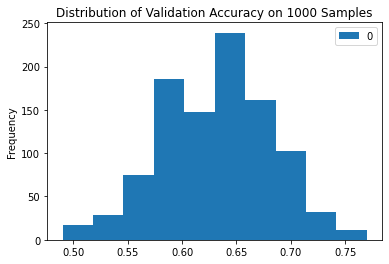

In [18]:
pd.DataFrame(accs).plot(kind='hist', title='Distribution of Validation Accuracy on 1000 Samples');

Final model

In [19]:
# include entire training data set, including the validation set b/c small dataset
output = computeCovMatrices(train_data)
covMatrices = output[0]
means = output[1]
sampleSizes = output[2]

In [20]:
X_test = pd.read_csv('X-test.csv', header=None)

In [21]:
preds_test = makePredictions(X_test)

In [22]:
pd.DataFrame(preds_test).to_csv('predictions.csv', header=None, index=None)

In [23]:
preds_test[0:5]

array([4, 4, 3, 1, 4])